# Pymaceuticals Inc.
---

### Analysis

- There is a strong correlation between weight and tumor volume for the Capomulin regimen.
- Infubinol had potential outliers, this can alter the results.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
study_data_complete['Mouse ID'].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep= False)]['Mouse ID'].unique()
duplicated

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete.loc[study_data_complete['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete[study_data_complete['Mouse ID'].isin(duplicated)==False]
clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_study_data['Mouse ID'].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance= clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std= clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# DataFrame
table = pd.DataFrame({
    'Mean Tumor': mean,
    'Median Tumor Size': median,
    'Variance': variance,
    "Standard Deviation": std,
    "SEM": sem
    }
)
table

,Mean Tumor,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

clean_study_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

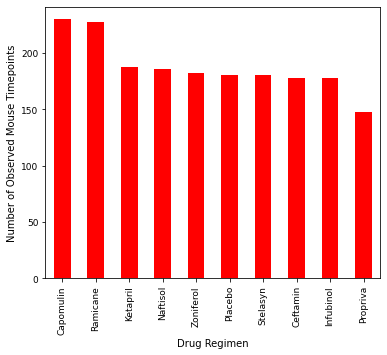

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_study_data.groupby('Drug Regimen')['Timepoint'].count()
drug_counts = drug_counts.sort_values(ascending=False)

ax = drug_counts.plot(kind="bar", figsize=(6, 5), color="red", fontsize=9)
ax.set_xlabel("Drug Regimen", fontsize=10)
ax.set_ylabel("Number of Observed Mouse Timepoints", fontsize=10)
plt.show()

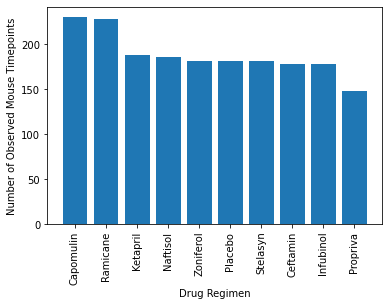

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts2 = clean_study_data.groupby('Drug Regimen')['Timepoint'].count()
drug_counts2 = drug_counts2.reset_index().rename(columns={'Timepoint': 'Number of Observed Mouse Timepoints'})
drug_counts2 = drug_counts2.sort_values(by='Number of Observed Mouse Timepoints', ascending=False)

x_value = drug_counts2['Drug Regimen']
label = drug_counts2['Number of Observed Mouse Timepoints']

plt.bar(x_value, label)

plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()

<AxesSubplot:ylabel='Sex'>

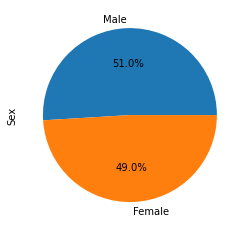

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_study_data['Sex'].value_counts()

gender_counts.plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%')

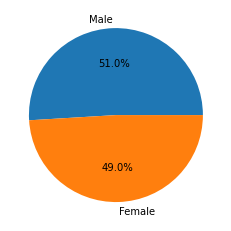

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels,autopct = '%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean = pd.DataFrame.copy(clean_study_data)
treatments = clean_study_data.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
treatments = treatments.groupby("Mouse ID")["Timepoint"].max()
treatments = pd.DataFrame(treatments).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(clean, treatments, on = ["Timepoint", "Mouse ID"])
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
list1 = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lq = quartiles[.25]
uq = quartiles[.75]
IQR = uq - lq

print(f"The lower quartile of Tumor Volume is: {lq} mm3.")
print(f"The upper quartile of Tumor Volume is: {uq} mm3.")
print(f"The interquartile range of Tumor Volume is: {IQR} mm3.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in merged.iterrows():
        if row["Drug Regimen"] == treatment:
            list1.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(list1)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lq - (1.5*IQR)
upper_bound = uq + (1.5*IQR)

print(f"The values below {lower_bound} may be outliers")
print(f"The values above {upper_bound} may be outliers")

The lower quartile of Tumor Volume is: 37.1877438025 mm3.
The upper quartile of Tumor Volume is: 59.930261755 mm3.
The interquartile range of Tumor Volume is: 22.742517952499995 mm3.
The values below 3.0739668737500097 may be outliers
The values above 94.04403868374999 may be outliers


Text(0.5, 1.0, 'Distribution Final Tumor Volume')

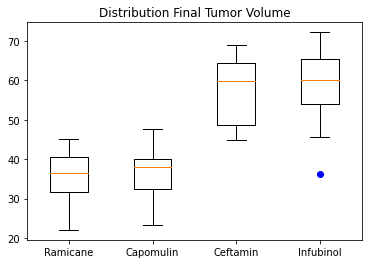

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"]], labels = treatments, sym = "b")
plt.title("Distribution Final Tumor Volume")

## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

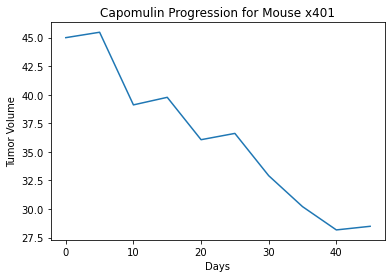

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
sM = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"].loc[clean_study_data["Mouse ID"] == "x401"]

lx_axis = sM["Timepoint"].tolist()
ly_axis = sM["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Days")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Progression for Mouse x401")
lx_axis

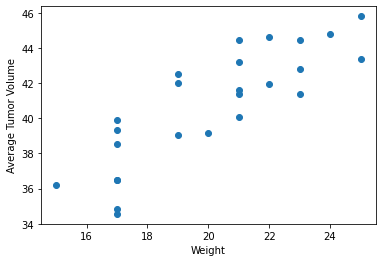

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']
cap_avg = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")

plt.show()

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_weight = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = capomulin_weight["Weight (g)"]
sy_axis = capomulin_weight["Tumor Volume (mm3)"]
correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print(f"The correlation is: {round(correlation[0],2)}")
print(f"Linear Regressions Model: y = {round(slope, 2)}x + {round(intercept, 2)}")

The correlation is: 0.84
Linear Regressions Model: y = 0.95x + 21.55
